In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn import tree
import librosa
import soundfile
import os, glob, pickle
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Extract features (mfcc, chroma, mel) from a sound file
#if chroma do short time fourier transform
#hstack() stacks arrays in sequence horizontally (in a columnar fashion)
#chroma-pertains to 12 pitch class,hstack() stacks arrays in sequence horizontally (in a columnar fashion),
#mel: Mel Spectrogram Frequency
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        sample_rate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:#frequency domain feature
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [3]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#DataFlair - Emotions to observe
observed_emotions=['neutral', 'calm', 'happy', 'fearful', 'surprised', 'angry']

In [4]:
#DataFlair - Load the data and extract features for each sound file
def load_data():
    x,y=[],[]
    for file in glob.glob("C:\\Users\COMPUTER\Desktop\Speech_Recognition_dataset\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        if emotion=='calm':
           emotion='not_confident'
        elif emotion=='fearful':
           emotion='not_confident'
        elif emotion=='neutral':
           emotion='not_confident'
        else:
          emotion='confident'
        y.append(emotion)
        
    return x,y

In [5]:
X,y=load_data()


In [6]:
import numpy
x = numpy.array(X)
y=numpy.array(y)
x.shape

(768, 180)

In [7]:
y.shape

(768,)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y)

In [12]:
parameter_space = {
    "max_depth": [2,3,5,10,15],
    "max_features": [1,3,4,5,8,10],
    #"min_features": [1,2,3],
    "max_leaf_nodes": [1,2,3],
    "min_samples_leaf": [1,3,5],
    "min_samples_split": range(2, 5),
    "criterion": ["gini", "entropy"]
            
}

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
model=tree.DecisionTreeClassifier()
clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=5)
clf.fit(x_train, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)
print("Accuracy :",clf.best_score_)
# All results
#means = clf.cv_results_['mean_test_score']
#stds = clf.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))


Best parameters found:
 {'criterion': 'gini', 'max_depth': 15, 'max_features': 10, 'max_leaf_nodes': 3, 'min_samples_leaf': 5, 'min_samples_split': 3}
Accuracy : 0.79167916041979


In [14]:
y_true, y_pred = y_test , clf.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
               precision    recall  f1-score   support

    confident       0.74      0.71      0.72        96
not_confident       0.72      0.75      0.73        96

     accuracy                           0.73       192
    macro avg       0.73      0.73      0.73       192
 weighted avg       0.73      0.73      0.73       192



In [15]:
##############################################the end ###########################################

In [16]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 72.92%


In [17]:
#model=tree.DecisionTreeClassifier()
#model.fit(x_train,y_train)

In [18]:
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 72.92%


In [19]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

    confident       0.74      0.71      0.72        96
not_confident       0.72      0.75      0.73        96

     accuracy                           0.73       192
    macro avg       0.73      0.73      0.73       192
 weighted avg       0.73      0.73      0.73       192



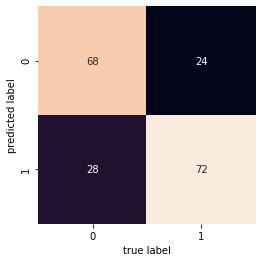

In [20]:
#cm=confusion_matrix(y_test,y_pred)
#cm
from sklearn.metrics import confusion_matrix
import seaborn as sns
#plt.figure(figsize=(10,7))
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');


In [21]:
from numpy import mean
from numpy import std
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def cross_validation(clf,x,y,cv=5):     
    scoring={'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1_macro': make_scorer(f1_score, average = 'macro'),
           #'f1_weighted': make_scorer(f1_score, average = 'weighted')
        }    
    results = cross_validate(clf, x, y, scoring=scoring, cv=cv, n_jobs=-1, return_train_score=True)

    return {"Training Accuracy scores": results['train_accuracy'],
             "Validation Accuracy scores": results['test_accuracy'], 
            
              "Training Precision scores": results['train_precision'],
              "Validation Precision scores": results['test_precision'],
          
              "Training Recall scores": results['train_recall'],
             "Validation Recall scores": results['test_recall'],
            
              "Training F1 scores": results['train_f1_macro'],
             "Validation F1 scores": results['test_f1_macro'],
            
             "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Mean Training Precision": results['train_precision'].mean(),
              "Mean Validation Precision": results['test_precision'].mean(),
              "Mean Training Recall": results['train_recall'].mean(),
              "Mean Validation Recall": results['test_recall'].mean(),
              "Mean Training F1 Score": results['train_f1_macro'].mean(),
              "Mean Validation F1 Score": results['test_f1_macro'].mean()
                      }


dt_result = cross_validation(clf, x_train,y_train, 5)
print(dt_result)

# report performance
#print('%.3f', 100*scores)
#print('Accuracy: %.3f (%.3f)' % (100*mean(scores['accuracy_score']), 100*std(scores['accuracy'])))

{'Training Accuracy scores': array([0.77826087, 0.76138829, 0.7505423 , 0.78308026, 0.77440347]), 'Validation Accuracy scores': array([0.71551724, 0.73043478, 0.75652174, 0.7826087 , 0.73913043]), 'Training Precision scores': array([0.77845036, 0.76529385, 0.78015973, 0.78480426, 0.78204509]), 'Validation Precision scores': array([0.71609538, 0.73214286, 0.78458165, 0.78266788, 0.74026172]), 'Training Recall scores': array([0.77826087, 0.76151892, 0.75089403, 0.78316394, 0.77458122]), 'Validation Recall scores': array([0.71551724, 0.7300363 , 0.75514217, 0.78266788, 0.73880823]), 'Training F1 scores': array([0.77822314, 0.76056697, 0.74394455, 0.78278488, 0.77294082]), 'Validation F1 scores': array([0.71532684, 0.72969899, 0.74968905, 0.7826087 , 0.73863636]), 'Mean Training Accuracy': 76.95350372536073, 'Mean Validation Accuracy': 74.48425787106446, 'Mean Training Precision': 0.7781506566726061, 'Mean Validation Precision': 0.7511498953113852, 'Mean Training Recall': 0.769683794466403

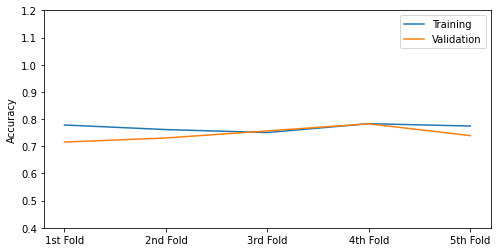

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold","7th Fold"]
X_axis = np.arange(len(labels))
plt.xticks(X_axis, labels)  
# Function to plot  
plt.ylim(0.40000, 1.2)
plt.plot(
dt_result["Training Accuracy scores"])
plt.plot(
dt_result["Validation Accuracy scores"])
plt.ylabel("Accuracy")  
# Function add a legend  
plt.legend(["Training", "Validation"], loc ="upper right")
  
# function to show the plot
plt.show()

In [24]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
x,y=load_data()
lda = LDA(n_components=1)
x = lda.fit_transform(x, y)
#x_test = lda.transform(x_test)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y)

In [33]:
model=tree.DecisionTreeClassifier( criterion='gini')
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
y_true, y_pred = y_test , model.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
               precision    recall  f1-score   support

    confident       0.81      0.83      0.82        96
not_confident       0.83      0.80      0.81        96

     accuracy                           0.82       192
    macro avg       0.82      0.82      0.82       192
 weighted avg       0.82      0.82      0.82       192



In [35]:
print(classification_report(y_test,y_pred))

               precision    recall  f1-score   support

    confident       0.81      0.83      0.82        96
not_confident       0.83      0.80      0.81        96

     accuracy                           0.82       192
    macro avg       0.82      0.82      0.82       192
 weighted avg       0.82      0.82      0.82       192

